
 Part A: Analytical Results 
2.a. P(exactly 7 calls in 20 minutes): 0.1478
2.b. P(more than 15 calls in 1 hour): 0.8435

3.a. Expected time between two calls: 3.00 minutes
3.b. P(time between calls > 5 minutes): 0.1889

4.a. Expected calls in 10 minutes: 3.33
4.b. Variance of calls in 10 minutes: 3.33

 Part B: Simulation Results 


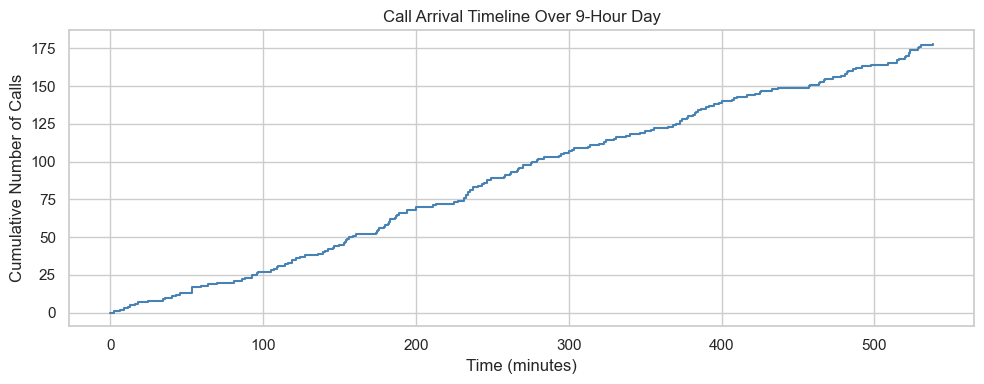

C:\Users\gyash\AppData\Local\Temp\ipykernel_29780\1385020326.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1, business_hours + 1),


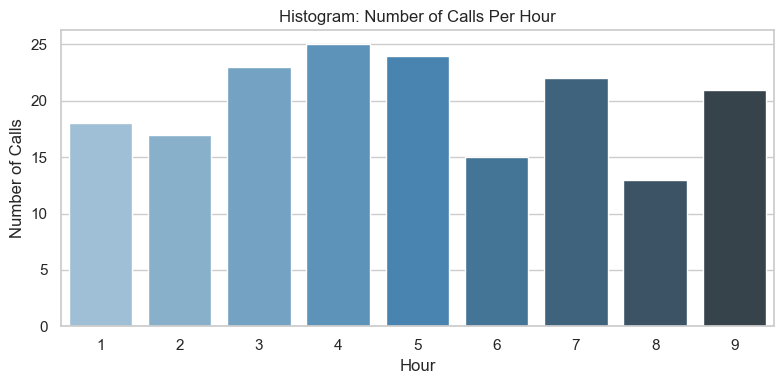


6.a. Simulated P(calls > 25 in an hour): 0.1070
6.b. Theoretical P(calls > 25 in an hour): 0.1122


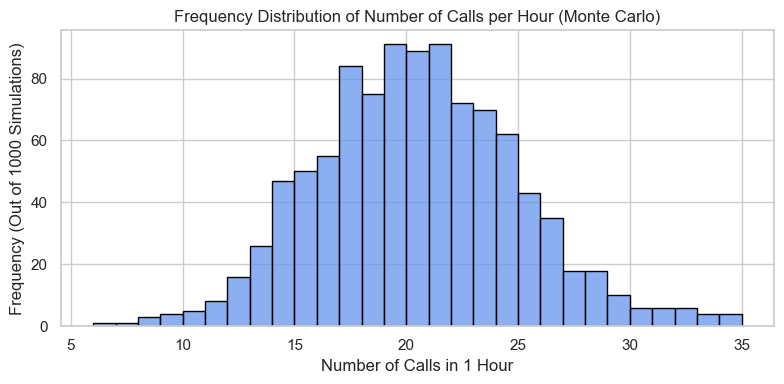


7.a. 95th percentile of hourly calls: 28.00
7.b. Recommended number of agents: 28


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, expon

# Set plot style
sns.set(style="whitegrid")

# Parameters
lambda_per_hour = 20        # Average rate of calls per hour
mu = 1 / lambda_per_hour   # Mean interarrival time in hours
business_hours = 9
total_minutes = business_hours * 60  # Total simulation time in minutes

# --------------------------------------------------
# Part A: Analytical Tasks
print("\n Part A: Analytical Results ")

# 2. Probability Analysis
# a. Probability of exactly 7 calls in 20 minutes
k = 7
interval_20min = 20 / 60  # hours
lambda_20min = lambda_per_hour * interval_20min
P_calls_20min = poisson.pmf(k, lambda_20min)

print(f"2.a. P(exactly 7 calls in 20 minutes): {P_calls_20min:.4f}")

# b. Probability of more than 15 calls in 1 hour
P_gt_15_hour = 1 - poisson.cdf(15, lambda_per_hour)
print(f"2.b. P(more than 15 calls in 1 hour): {P_gt_15_hour:.4f}")

# 3. Waiting Time Analysis
expected_time_min = mu * 60  # Expected time between calls in minutes
P_gt_5min = np.exp(-lambda_per_hour * (5 / 60))  # P(time between calls > 5 mins)

print(f"\n3.a. Expected time between two calls: {expected_time_min:.2f} minutes")
print(f"3.b. P(time between calls > 5 minutes): {P_gt_5min:.4f}")

# 4. Queue Load Assessment (10-minute interval)
interval_10min = 10 / 60  # hours
expected_calls_10min = lambda_per_hour * interval_10min
variance_calls_10min = expected_calls_10min

print(f"\n4.a. Expected calls in 10 minutes: {expected_calls_10min:.2f}")
print(f"4.b. Variance of calls in 10 minutes: {variance_calls_10min:.2f}")

# --------------------------------------------------
# Part B: Simulation Tasks
print("\n Part B: Simulation Results ")

# 5. Simulate call arrivals for a 9-hour day
np.random.seed(0)  # For reproducibility
interarrival_times = expon.rvs(scale=60 / lambda_per_hour, size=2000)  # in minutes
arrival_times = np.cumsum(interarrival_times)
arrival_times = arrival_times[arrival_times < total_minutes]

mean_interarrival = 60 / lambda_per_hour  # Mean interarrival time in minutes
total_time = business_hours * 60          # Total time: 9 hours = 540 minutes

# a. Timeline plot
plt.figure(figsize=(10, 4))
plt.step(np.insert(arrival_times, 0, 0),
         np.arange(len(arrival_times) + 1),
         where="post",
         color="steelblue")
plt.title("Call Arrival Timeline Over 9-Hour Day")
plt.xlabel("Time (minutes)")
plt.ylabel("Cumulative Number of Calls")
plt.tight_layout()
plt.show()

# b. Histogram of calls per hour
bins = np.arange(0, total_minutes + 60, 60)
calls_per_hour, _ = np.histogram(arrival_times, bins=bins)

plt.figure(figsize=(8, 4))
sns.barplot(x=np.arange(1, business_hours + 1),
            y=calls_per_hour,
            palette="Blues_d")
plt.title("Histogram: Number of Calls Per Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Calls")
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 6. Monte Carlo Simulation (1000 simulations)
simulations = 1000
call_counts_sim = np.random.poisson(lambda_per_hour, size=simulations)

# a. Probability of more than 25 calls
prob_sim_gt_25 = np.mean(call_counts_sim > 25)
prob_theoretical_gt_25 = 1 - poisson.cdf(25, lambda_per_hour)

print(f"\n6.a. Simulated P(calls > 25 in an hour): {prob_sim_gt_25:.4f}")
print(f"6.b. Theoretical P(calls > 25 in an hour): {prob_theoretical_gt_25:.4f}")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.histplot(call_counts_sim,
             bins=range(min(call_counts_sim), max(call_counts_sim) + 1),
             kde=False,
             color="cornflowerblue",
             edgecolor="black")

# Customize the plot
plt.title("Frequency Distribution of Number of Calls per Hour (Monte Carlo)")
plt.xlabel("Number of Calls in 1 Hour")
plt.ylabel("Frequency (Out of 1000 Simulations)")
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 7. System Load Estimation
percentile_95 = np.percentile(call_counts_sim, 95)
agents_required = int(np.ceil(percentile_95))

print(f"\n7.a. 95th percentile of hourly calls: {percentile_95:.2f}")
print(f"7.b. Recommended number of agents: {agents_required}")
